# Cross Entropy 2D Optimisation (Beta Distribution)

Copyright 2016, Maria Kovaleva, David Bulger.
Macquarire University. All rights reserved.  
Adapted from MATLAB to Python/Jupyter by Liam Ryan 29/06/2020.

Two dimensional optimisation algorithm using the [Cross Entropy Method](https://en.wikipedia.org/wiki/Cross-entropy_method).
Data is fitted to a [Beta Distribution](https://en.wikipedia.org/wiki/Beta_distribution) in the algorithm. Parameters and the [fitness function](https://en.wikipedia.org/wiki/Fitness_function) can easily be changed.

Can be obtained as a .py or .ipynb here via Github [here](https://github.com/LDRyan0/2D-Cross-Entropy-Optimisation).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.stats import beta

### Set the design parameters here

In [2]:
x_range = (-5, 5)
y_range = (-5, 5)

### Set Cross Entropy parameters here

In [3]:
genSize = 20 # generation size
qElite = 5 # elite size (inclusive)
smoothing = 0.5 # smoothing parameter
fBestAntenna = -100000 # initial best
N_it = 15 # number of iterations

### Set fitness function here
Define fitness function in terms of x and y

In [4]:
def func(x,y):
    return -(-20*math.exp(-0.2*math.sqrt(0.5*(x**2+y**2)))-math.exp(0.5*(math.cos(2*math.pi*x)+math.cos(2*math.pi*y)))+20+math.exp(1))

### Execution of CE Optimisation Algorithm

In [5]:
# Creating arrays 
average_fitness_plot = np.zeros(N_it)
fBestAntenna_plot = np.zeros(N_it)

best_x = 0
best_y = 0

## Set initial distribution parameters
beta_alpha = np.ones((2,1))
beta_beta = np.ones((2,1))
## Start Cross-Entropy Optimization Algorithm
for i in range(N_it):
    # Sample 'x' and 'y' from the beta-distribution
    # The goal is to create a vector of size (1,genSize)  
    beta_alpha_r = np.tile(beta_alpha, genSize)
    beta_beta_r = np.tile(beta_beta, genSize)
    
    x = np.random.beta(beta_alpha_r[0,:], beta_beta_r[0,:])
    x_real = x * (x_range[1]-x_range[0]) + x_range[0]
    y = np.random.beta(beta_alpha_r[1,:], beta_beta_r[1,:])
    y_real = y * (y_range[1]-y_range[0]) + y_range[0]
    
    # Fitness evaluation - Here is your Goal Function
    fitness = np.zeros(genSize)
    for j in range(genSize):
        fitness[j] = func(x_real[j], y_real[j])
        
    # After fitness evaulation is done, we sort the best parameters (quicksort...O(n*logn))
    sortOrder = np.argsort(fitness)[::-1] # reverse for descending order
    fitness = np.sort(fitness)[::-1] # reverse for descending order

    # only take qElite number of the total generation
    sortOrder = sortOrder[0:qElite]
    # the elite, in descending order of fitness:
    elite_x = x[sortOrder]
    elite_y = y[sortOrder]

    # has this generation produced a new best antenna?
    if fitness[0] > fBestAntenna:
        fBestAntenna = fitness[0]
        best_x = elite_x[0]
        best_y = elite_y[0]
    
    # plot vs iterations
    average_fitness_plot[i] = np.mean(fitness)
    fBestAntenna_plot[i] = fBestAntenna

    if i < N_it: # don't bother in the last generation
        xa, xb, xloc, xscale = beta.fit(elite_x, floc=0, fscale=1) # returns alpha, beta, location and scale
        ya, yb, yloc, yscale = beta.fit(elite_y, floc=0, fscale=1) # returns alpha, beta, location and scale
        new_beta_alpha = np.array(xa, ya)
        new_beta_beta = np.array(xb, yb)
        # Smoothing in optional (defined in a conventional way)
        beta_alpha = beta_alpha + smoothing*(new_beta_alpha-beta_alpha)
        beta_beta = beta_beta + smoothing*(new_beta_beta-beta_beta)


### Results


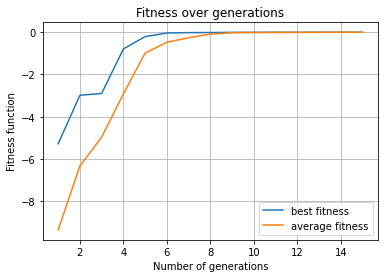

Best point (x,y): (0.49999061849879634, 0.5000043470543333)
    Best fitness: -0.0002927356303463746


In [6]:
fig, ax = plt.subplots()
ax.plot(np.arange(1, N_it+1), fBestAntenna_plot)
ax.plot(np.arange(1, N_it+1), average_fitness_plot)
ax.set_title('Fitness over generations')
ax.set_xlabel('Number of generations')
ax.set_ylabel('Fitness function')
ax.legend(['best fitness', 'average fitness'])
ax.grid()
plt.show()

# output the best x and y value, corresponding fitness
print("Best point (x,y): ({}, {})".format(best_x, best_y))
print("    Best fitness:", fBestAntenna)